# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Age

In [2]:
df = df_clean.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


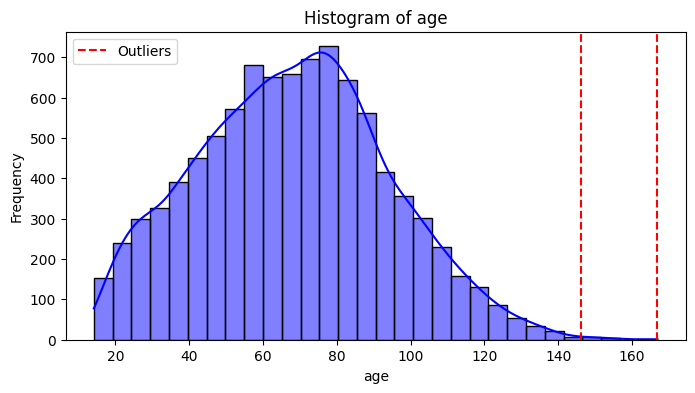

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1434
           1       0.80      0.89      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.588795, 0.954545, 'avg_glucose_level <= 161.57\nsamples = 6554\nvalue = [3267, 3287]\nclass = 1')


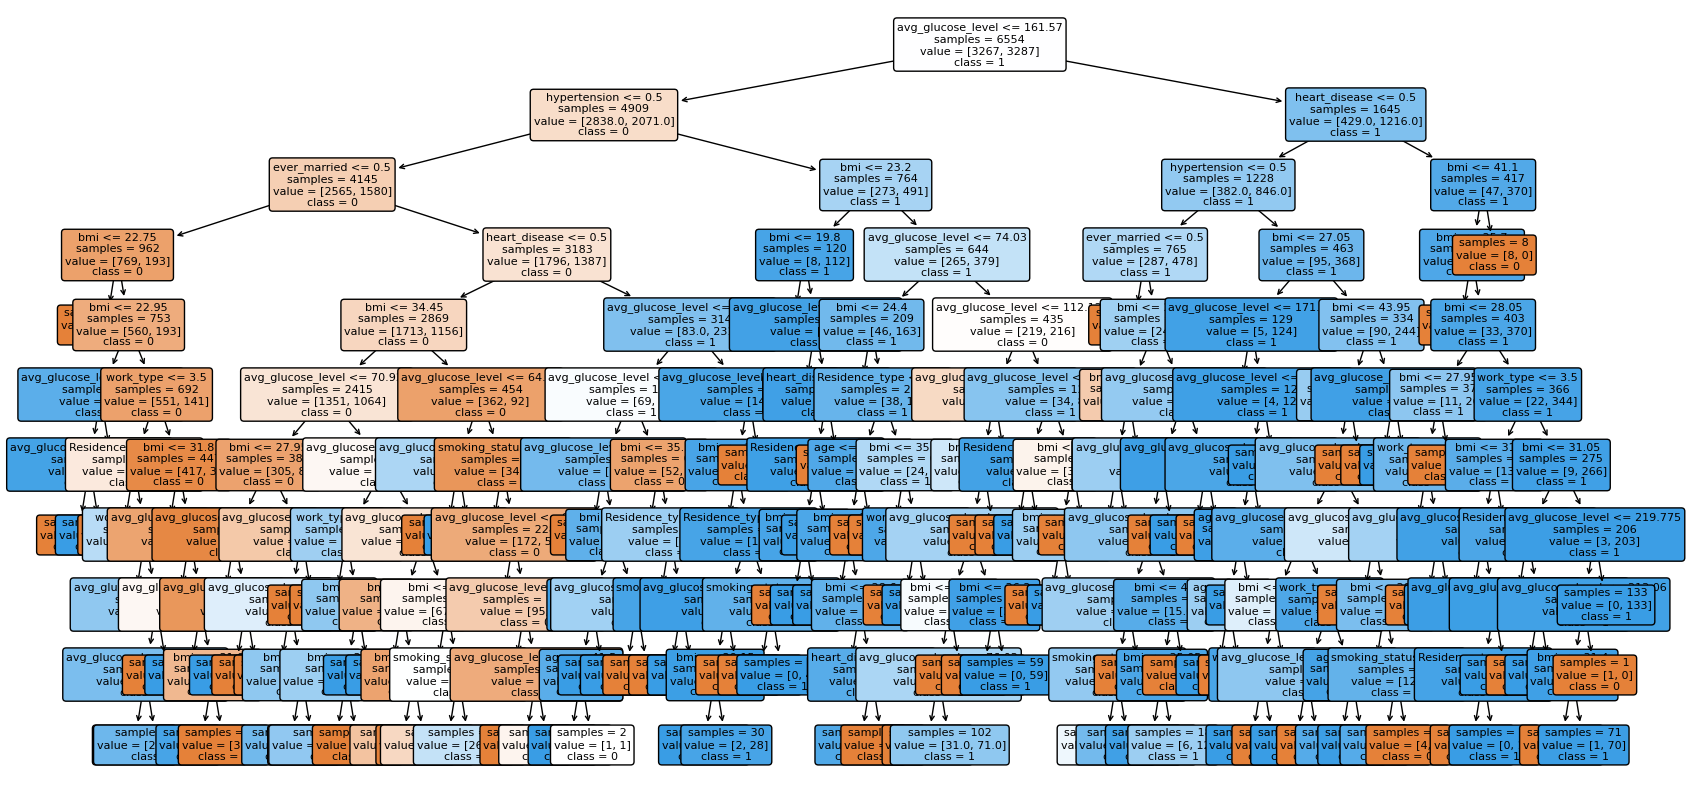

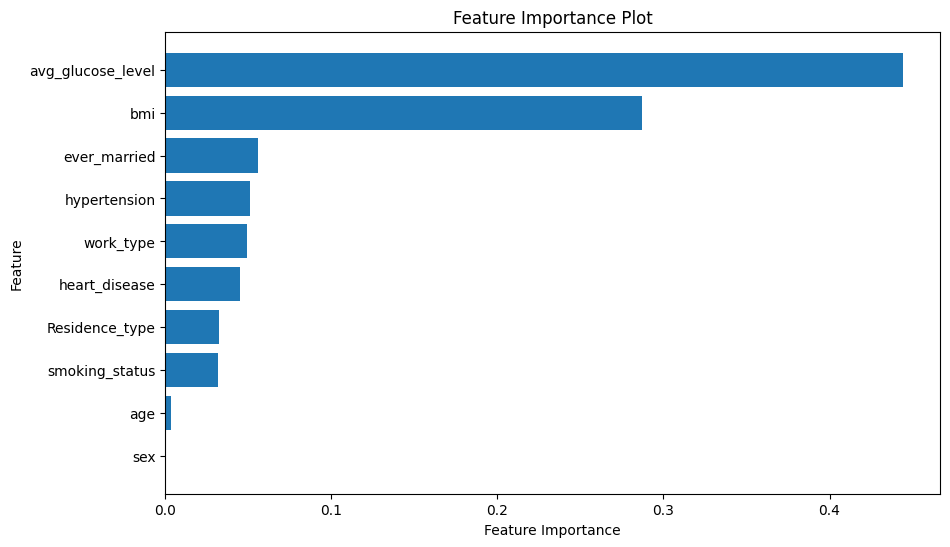

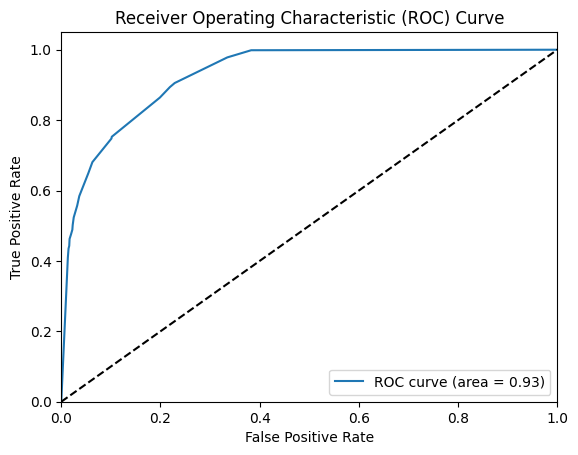

AUC Score: 0.9281138582477495


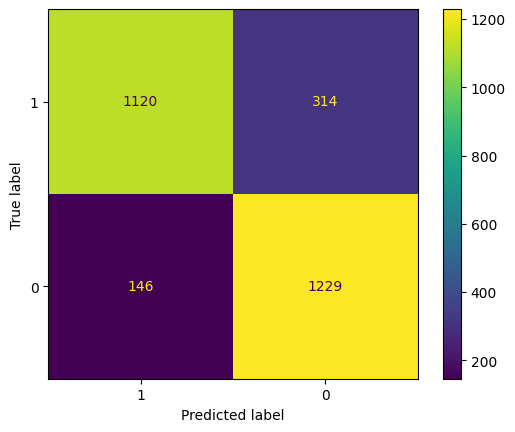

Accuracy for each fold: [0.8042704626334519, 0.8149466192170819, 0.8861209964412812, 0.8220640569395018, 0.8398576512455516, 0.8256227758007118, 0.8256227758007118, 0.8256227758007118, 0.8327402135231317, 0.8071428571428572]
Mean accuracy: 0.8284011184544994
95% confidence interval: (0.8119492818272955, 0.8448529550817032)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


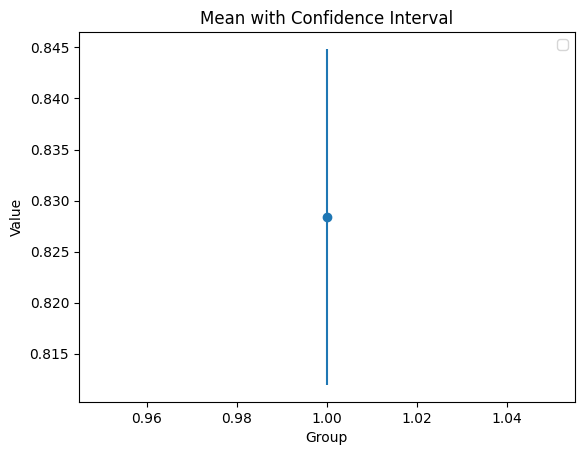

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_clean)
mean_accuracy_dt_age, confidence_interval_dt_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1434
           1       0.85      0.92      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809



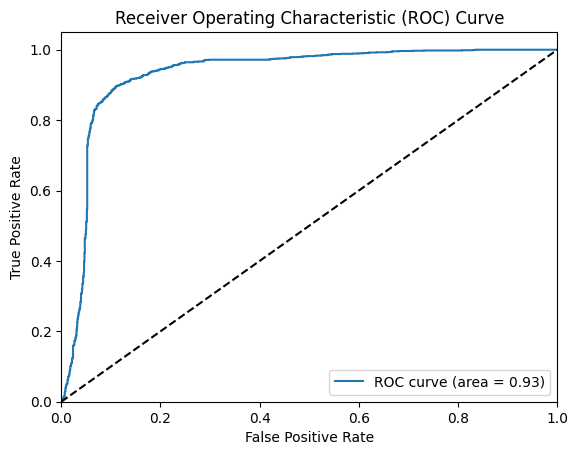

AUC Score: 0.9297730442500317


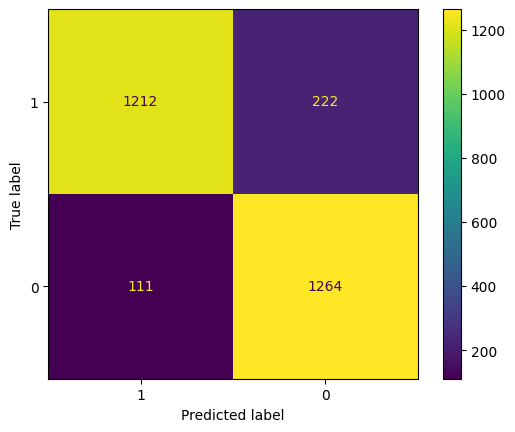

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8042704626334519, 0.8042704626334519, 0.7935943060498221, 0.7580071174377224, 0.7651245551601423, 0.7330960854092526, 0.7829181494661922, 0.7544483985765125, 0.7864768683274022, 0.7642857142857142]
Mean accuracy: 0.7746492119979664
95% confidence interval: (0.7579034111582791, 0.7913950128376538)


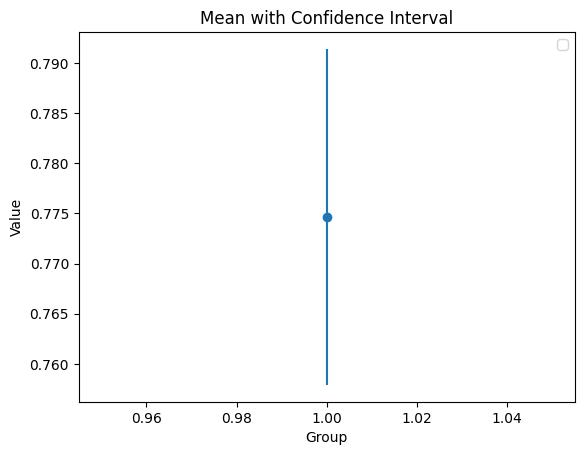

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_clean)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_age, 'age')

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1434
           1       0.80      0.89      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.582956, 0.954545, 'avg_glucose_level <= 161.57\nsamples = 6554\nvalue = [3267, 3287]\nclass = 1')


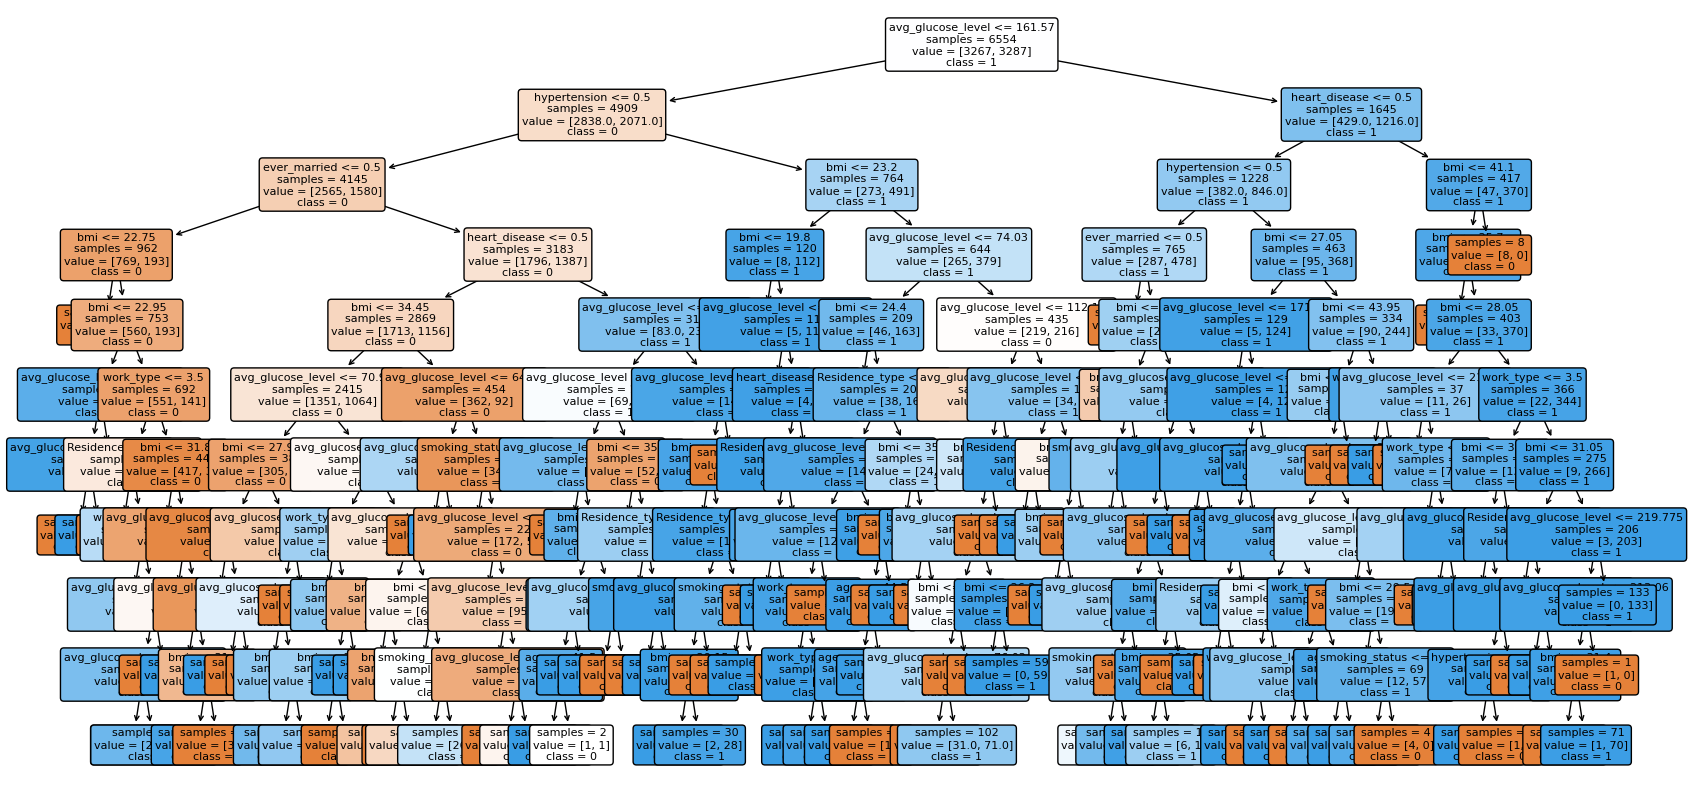

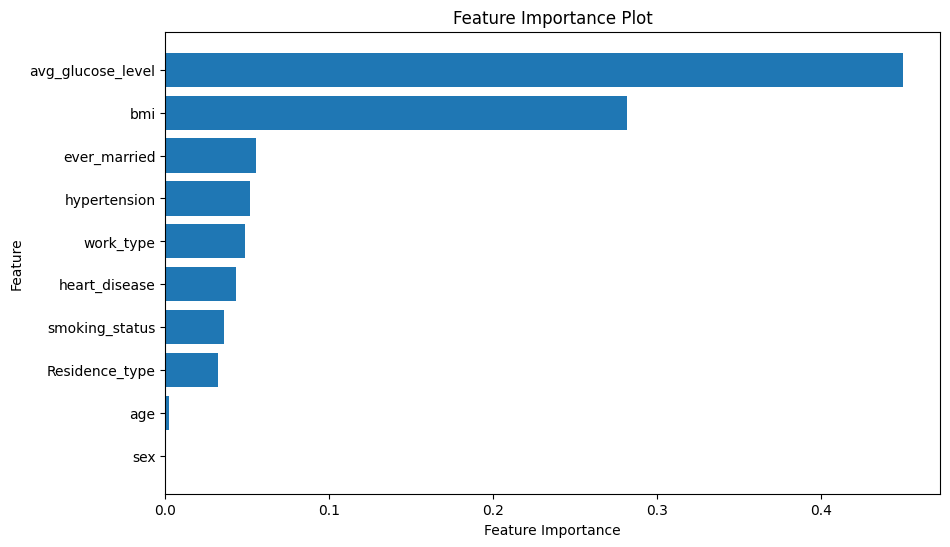

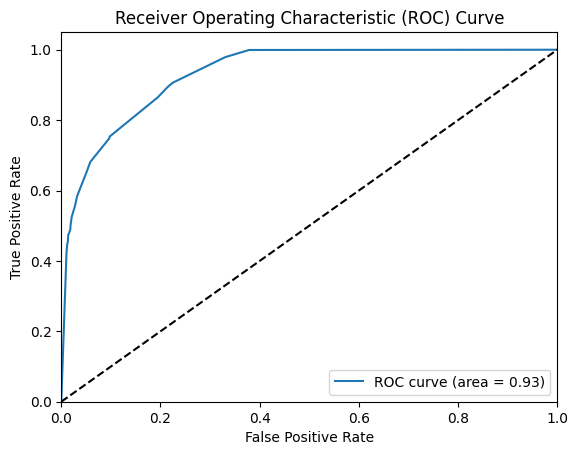

AUC Score: 0.9316733865855206


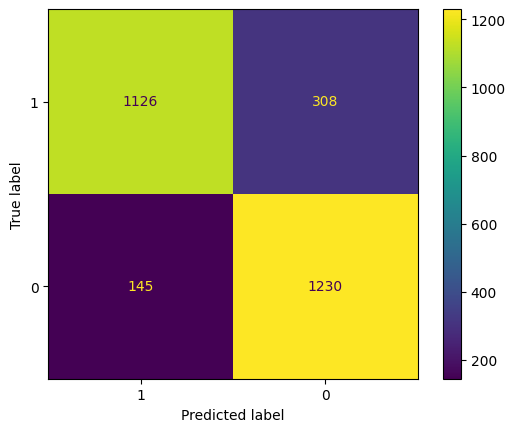

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8505338078291815, 0.8291814946619217, 0.8256227758007118, 0.8327402135231317, 0.7686832740213523, 0.8398576512455516, 0.7758007117437722, 0.8042704626334519, 0.7935943060498221, 0.8035714285714286]
Mean accuracy: 0.8123856126080324
95% confidence interval: (0.7926838532413543, 0.8320873719747106)


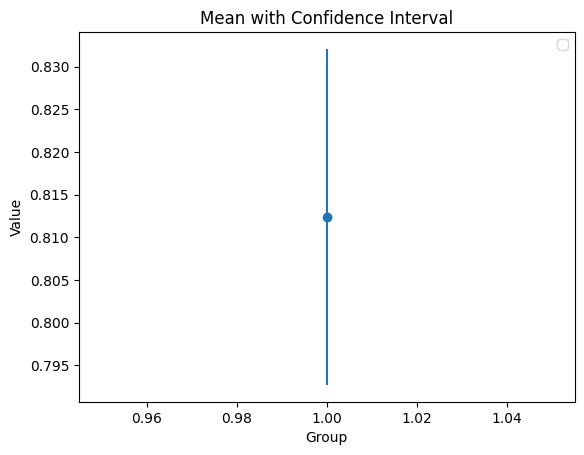

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_clean)
mean_accuracy_dt_20_age, confidence_interval_dt_20_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1434
           1       0.85      0.92      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.89      0.88      0.88      2809



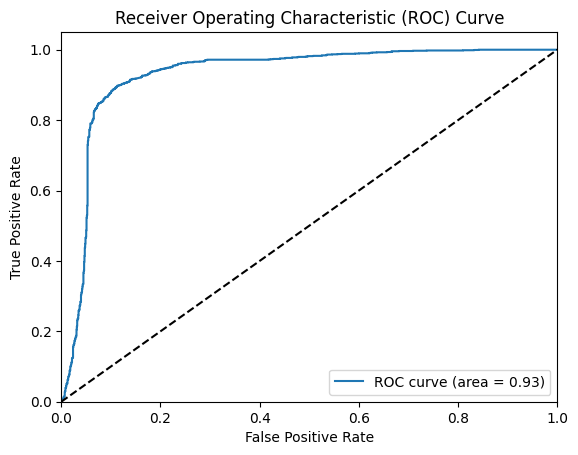

AUC Score: 0.9293850640294156


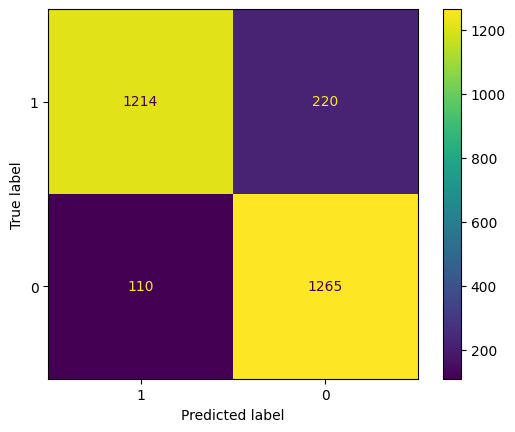

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7473309608540926, 0.7900355871886121, 0.7793594306049823, 0.7900355871886121, 0.7615658362989324, 0.797153024911032, 0.7580071174377224, 0.7722419928825622, 0.7473309608540926, 0.7892857142857143]
Mean accuracy: 0.7732346212506356
95% confidence interval: (0.7598668061428312, 0.78660243635844)


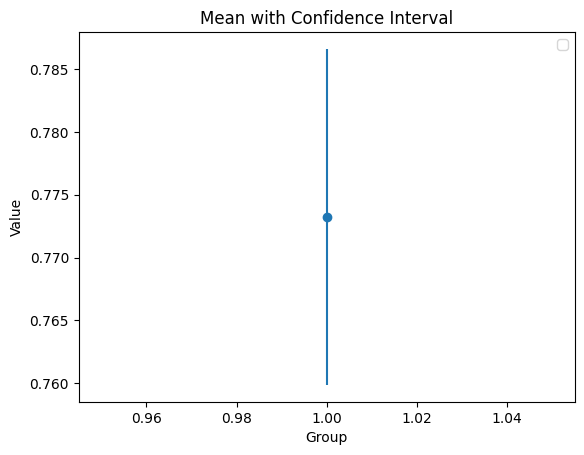

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_clean)
mean_accuracy_svm_20_age, confidence_interval_svm_20_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_clean.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


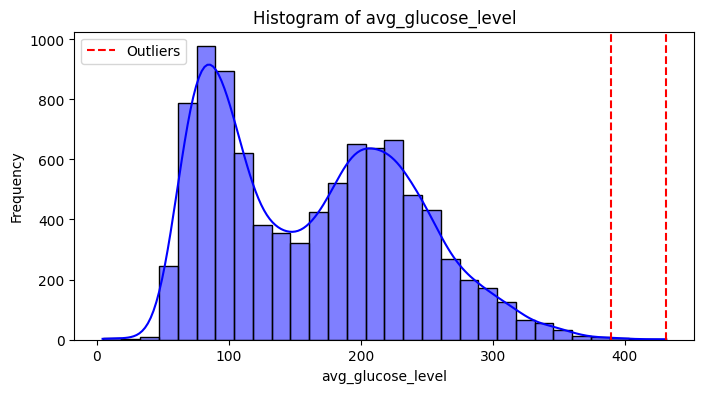

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1434
           1       0.73      0.85      0.79      1375

    accuracy                           0.78      2809
   macro avg       0.78      0.78      0.77      2809
weighted avg       0.78      0.78      0.77      2809

Node Labels:
 Annotation(0.610466, 0.954545, 'heart_disease <= 0.5\nsamples = 6554\nvalue = [3275.0, 3279.0]\nclass = 1')


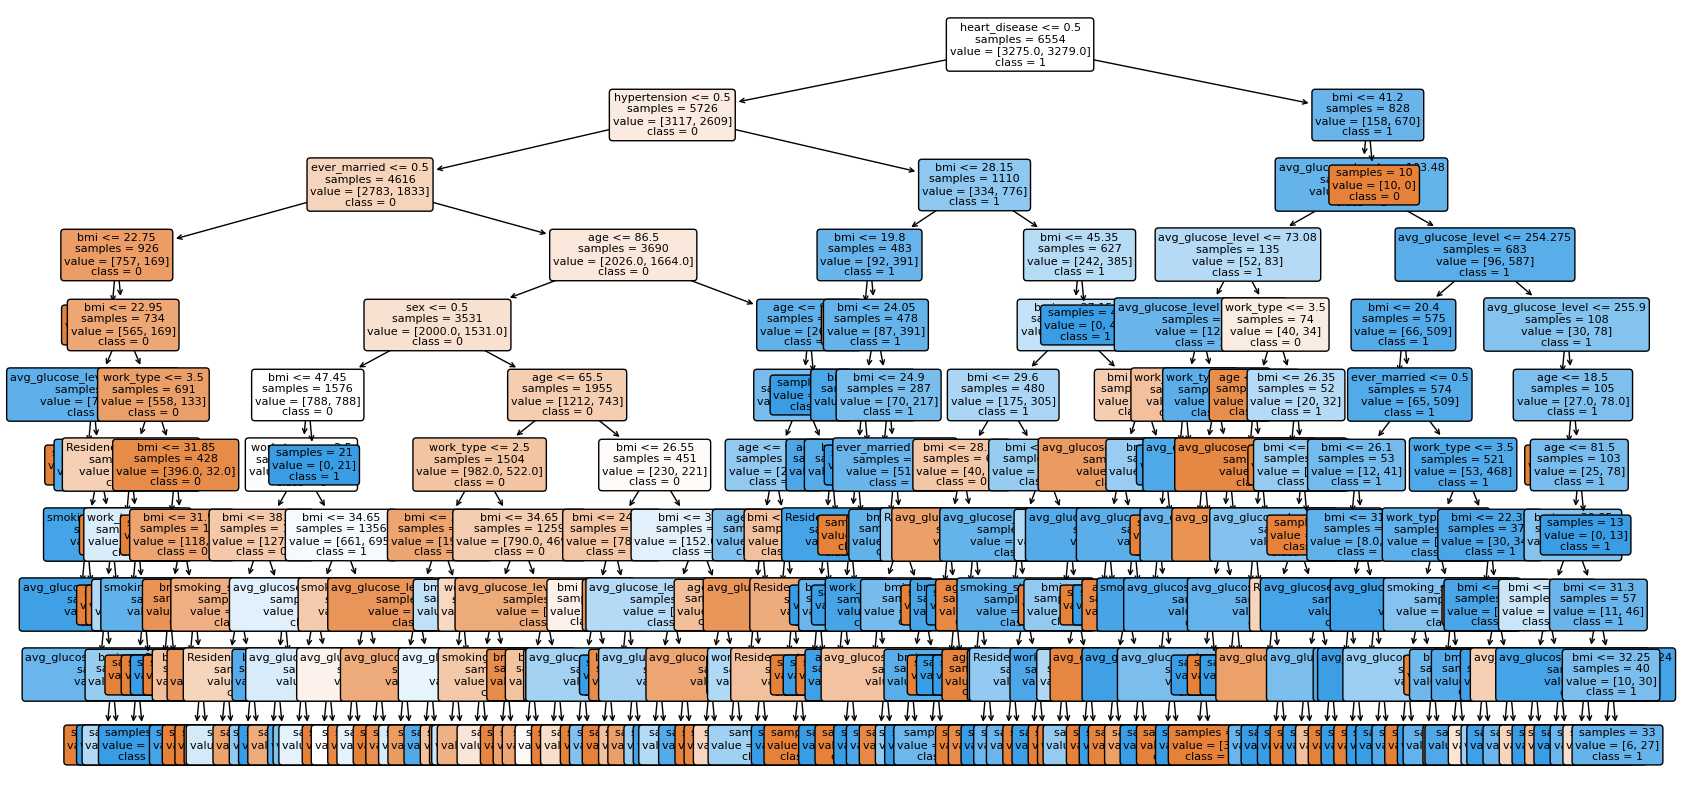

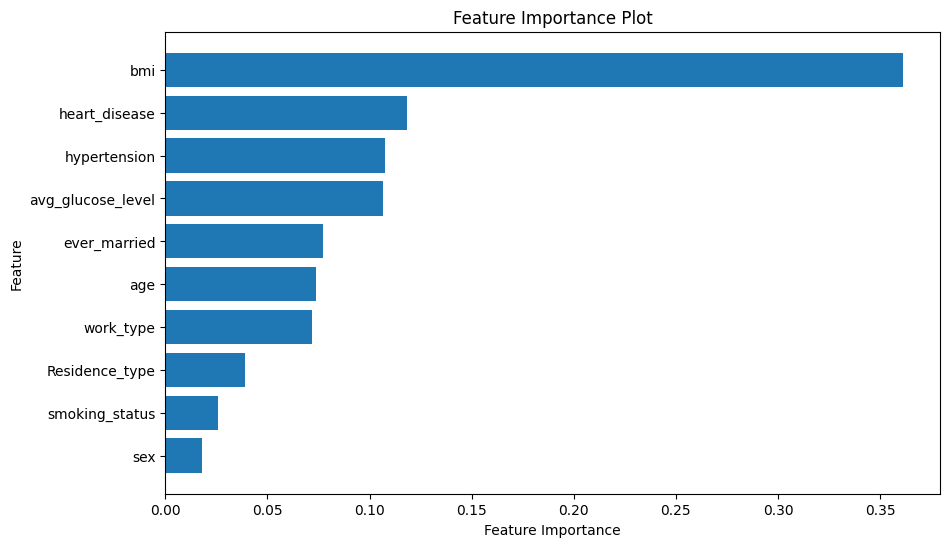

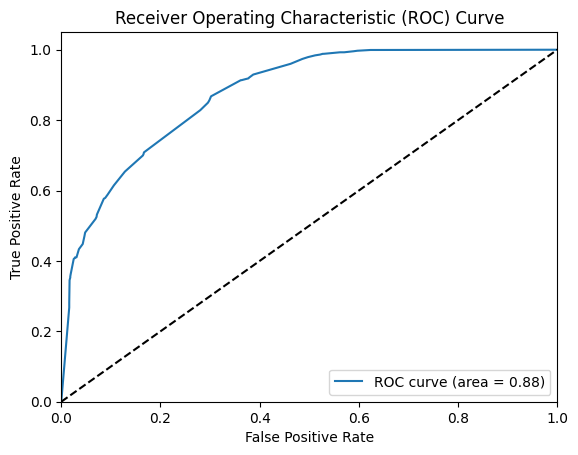

AUC Score: 0.8759424369215164


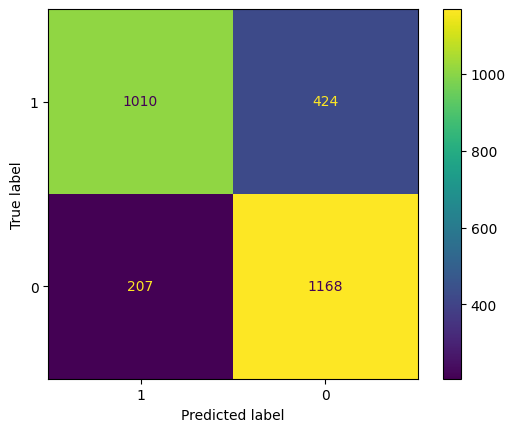

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7829181494661922, 0.8149466192170819, 0.8291814946619217, 0.7864768683274022, 0.797153024911032, 0.7864768683274022, 0.7900355871886121, 0.8398576512455516, 0.8362989323843416, 0.8428571428571429]
Mean accuracy: 0.810620233858668
95% confidence interval: (0.793008660288817, 0.828231807428519)


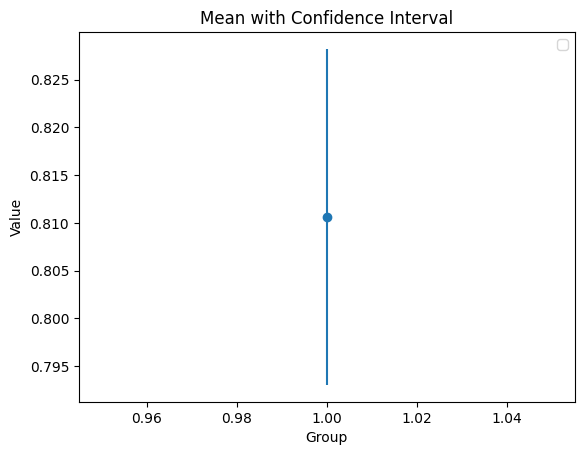

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_clean)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1434
           1       0.78      0.80      0.79      1375

    accuracy                           0.79      2809
   macro avg       0.79      0.79      0.79      2809
weighted avg       0.79      0.79      0.79      2809



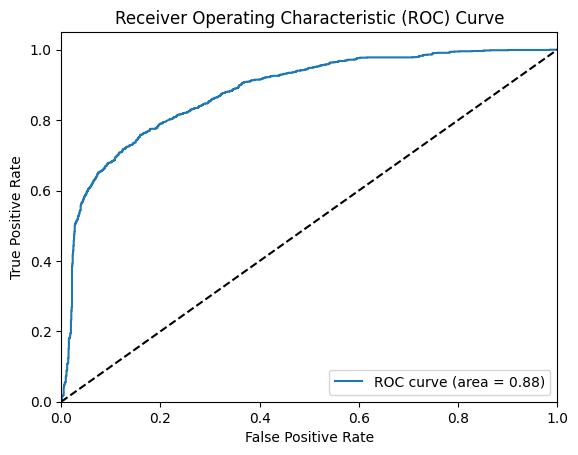

AUC Score: 0.8799893495625712


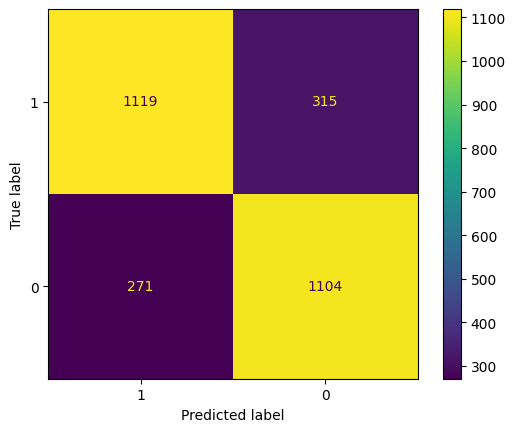

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7758007117437722, 0.797153024911032, 0.7829181494661922, 0.7793594306049823, 0.7615658362989324, 0.7793594306049823, 0.7793594306049823, 0.7651245551601423, 0.7580071174377224, 0.7607142857142857]
Mean accuracy: 0.7739361972547026
95% confidence interval: (0.7651082024198663, 0.782764192089539)


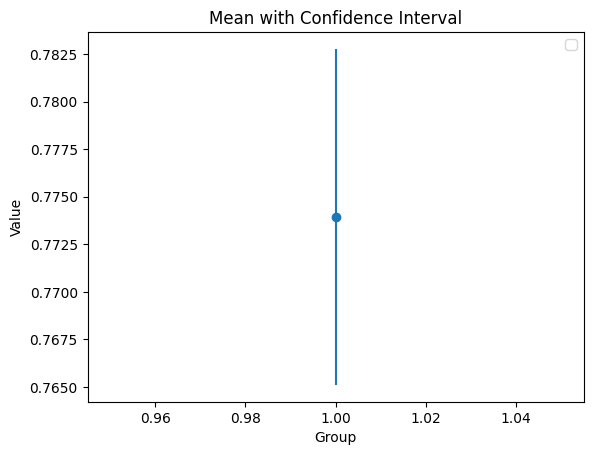

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_clean)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_glucose, 'avg_glucose_level')

Outliers found:


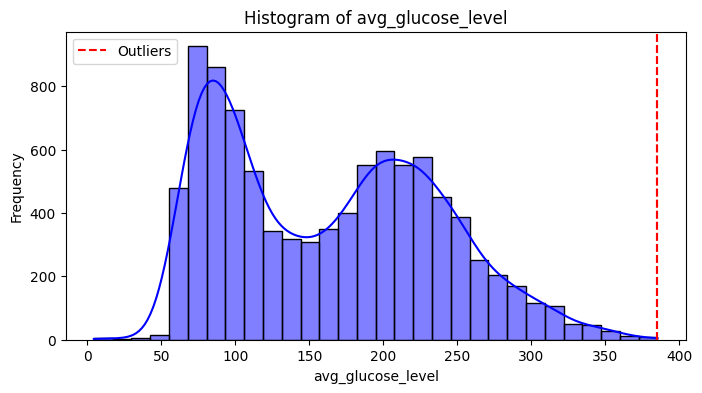

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1434
           1       0.73      0.85      0.79      1375

    accuracy                           0.78      2809
   macro avg       0.78      0.78      0.78      2809
weighted avg       0.78      0.78      0.77      2809

Node Labels:
 Annotation(0.597539, 0.954545, 'heart_disease <= 0.5\nsamples = 6554\nvalue = [3275.0, 3279.0]\nclass = 1')


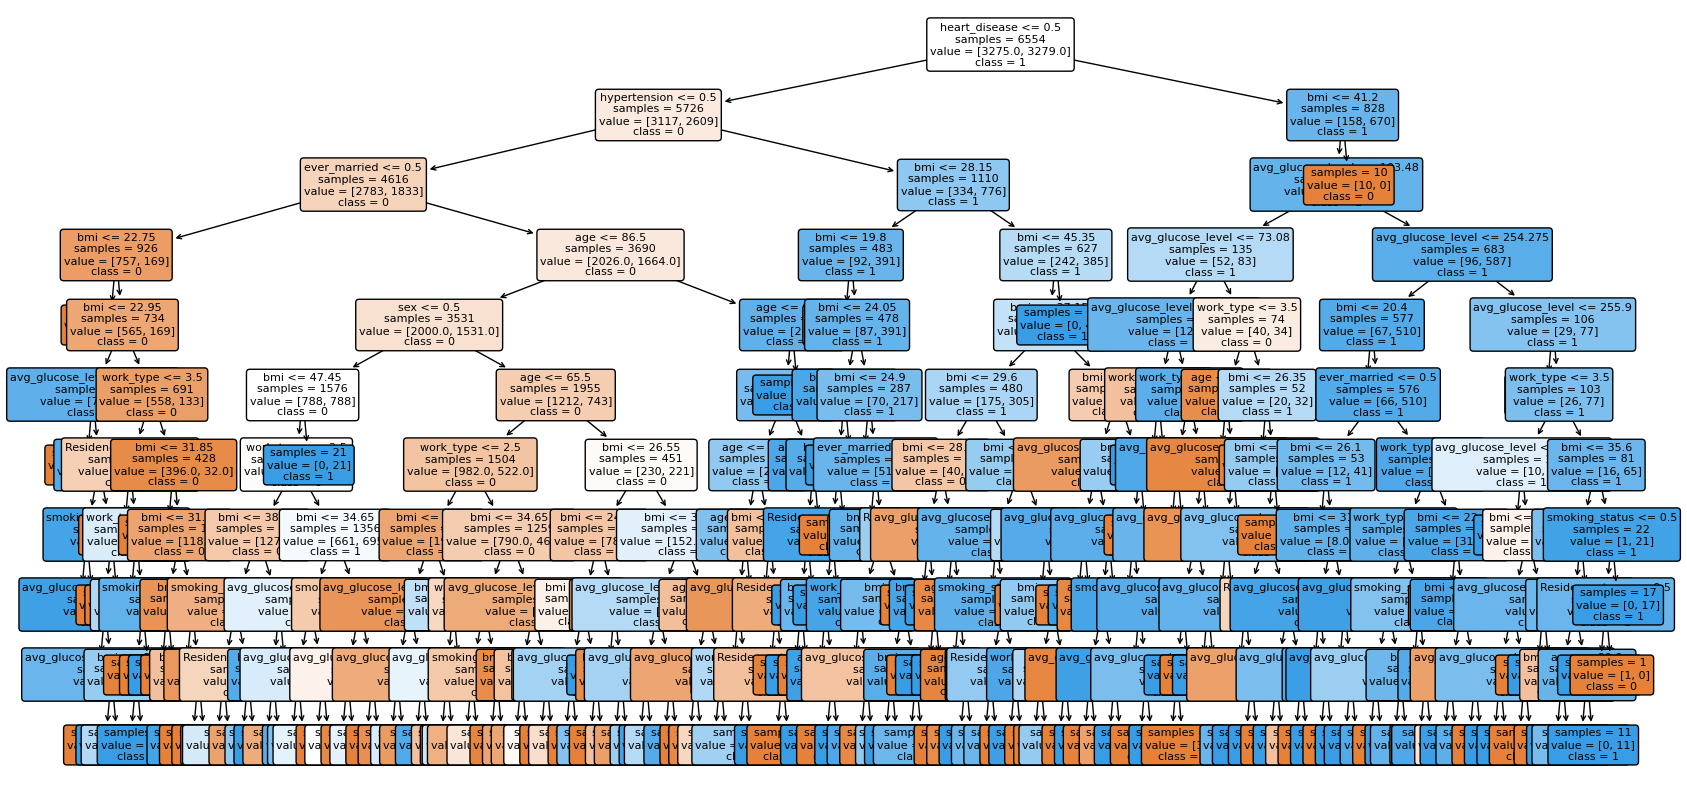

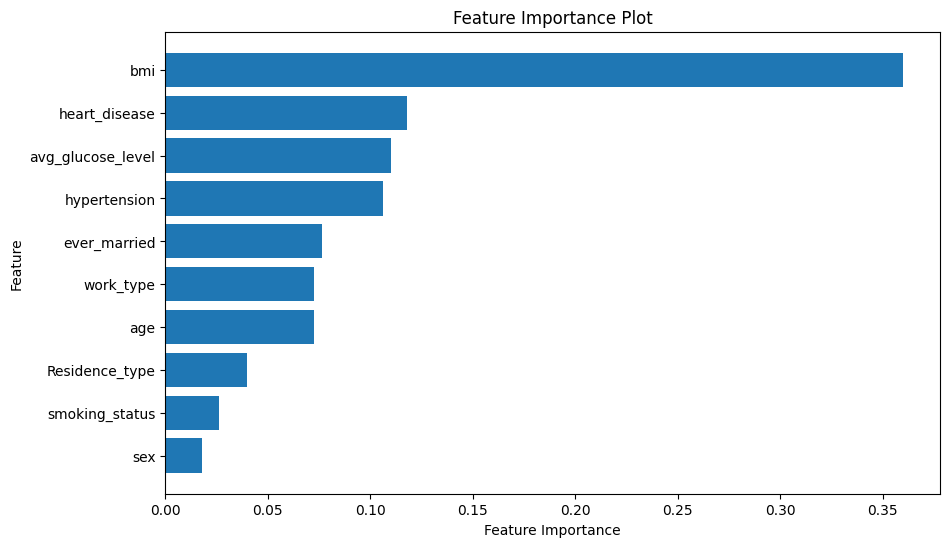

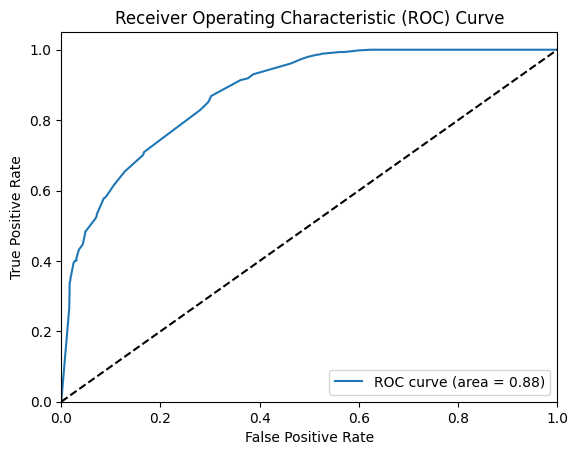

AUC Score: 0.8763413211614048


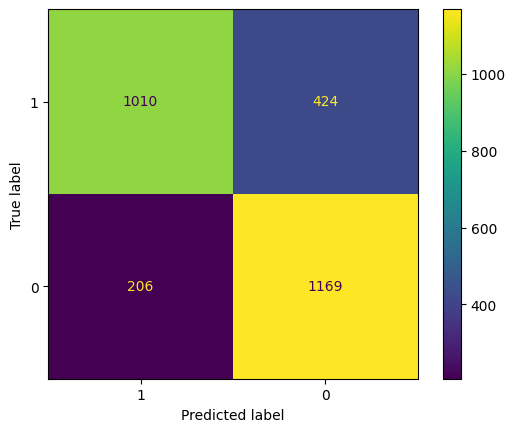

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8362989323843416, 0.8078291814946619, 0.797153024911032, 0.8540925266903915, 0.8327402135231317, 0.800711743772242, 0.8647686832740213, 0.8398576512455516, 0.8113879003558719, 0.8464285714285714]
Mean accuracy: 0.8291268429079818
95% confidence interval: (0.812315321643428, 0.8459383641725355)


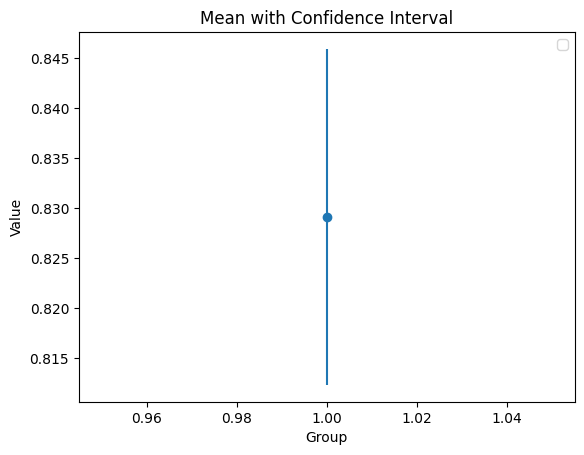

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_clean)
mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1434
           1       0.81      0.86      0.83      1375

    accuracy                           0.83      2809
   macro avg       0.83      0.83      0.83      2809
weighted avg       0.83      0.83      0.83      2809



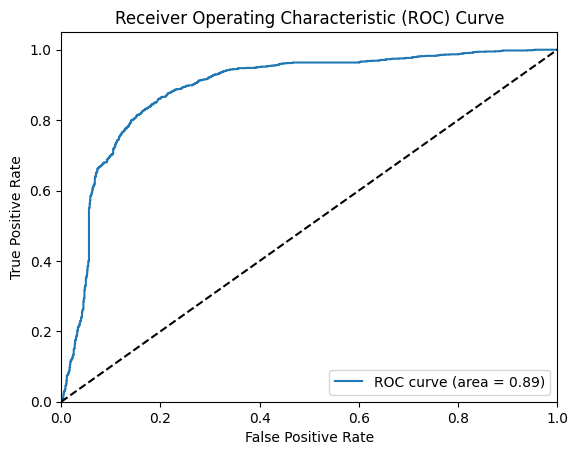

AUC Score: 0.8889529605680233


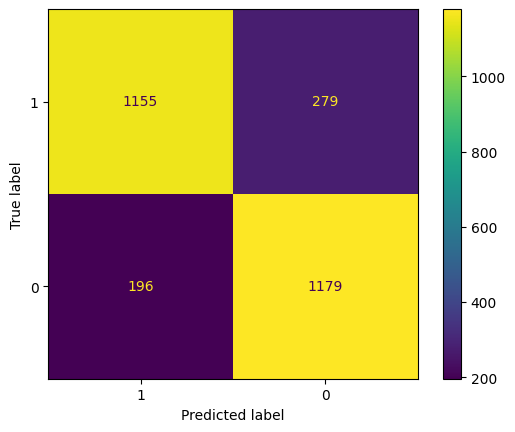

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7900355871886121, 0.7544483985765125, 0.7900355871886121, 0.7829181494661922, 0.7330960854092526, 0.7935943060498221, 0.7544483985765125, 0.7793594306049823, 0.7722419928825622, 0.7714285714285715]
Mean accuracy: 0.7721606507371632
95% confidence interval: (0.7582157671072617, 0.7861055343670648)


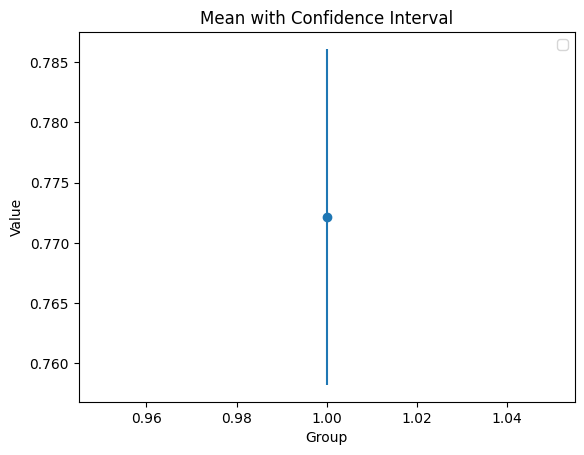

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_clean)
mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## bmi

In [22]:
df = df_clean.copy()

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

--------------------------------------
no outliers detected


In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


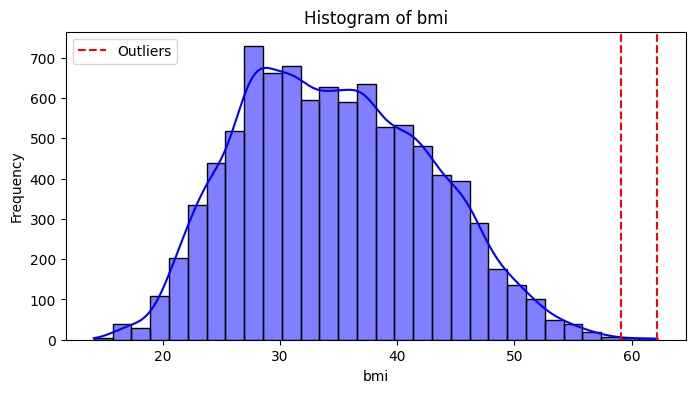

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1434
           1       0.86      0.81      0.83      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.647129, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3326, 3228]\nclass = 0')


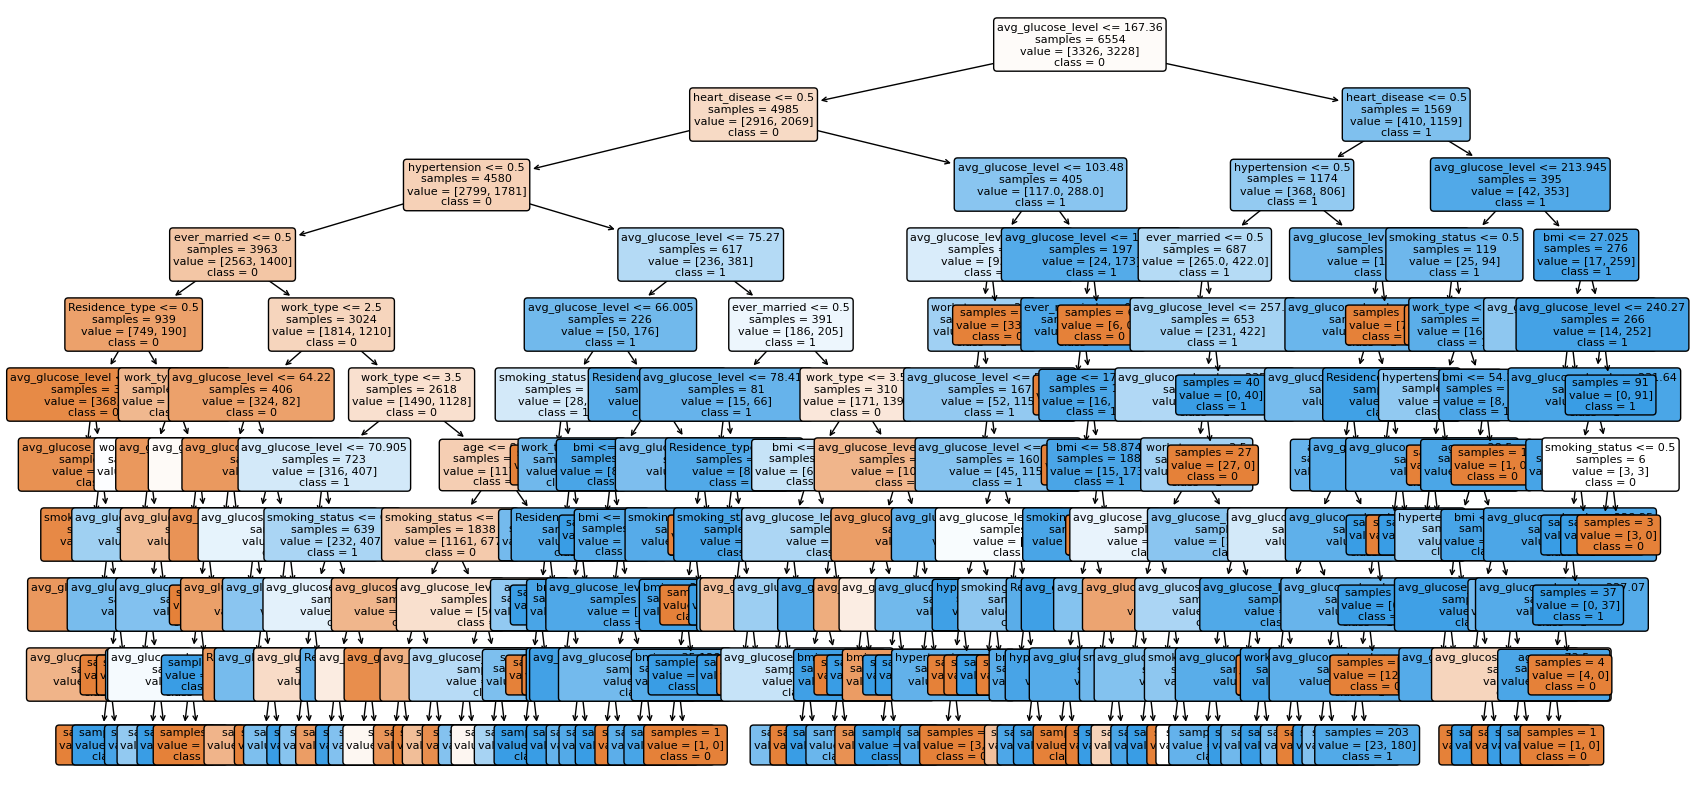

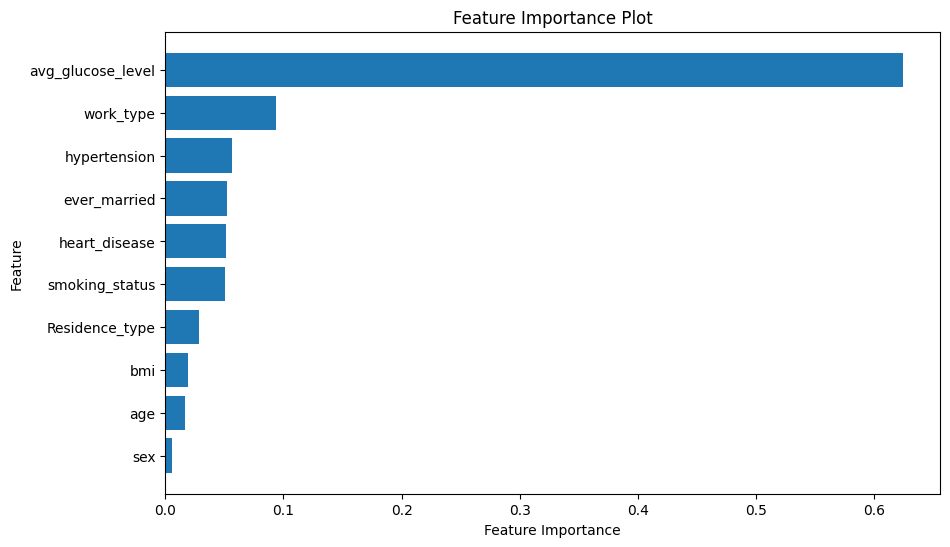

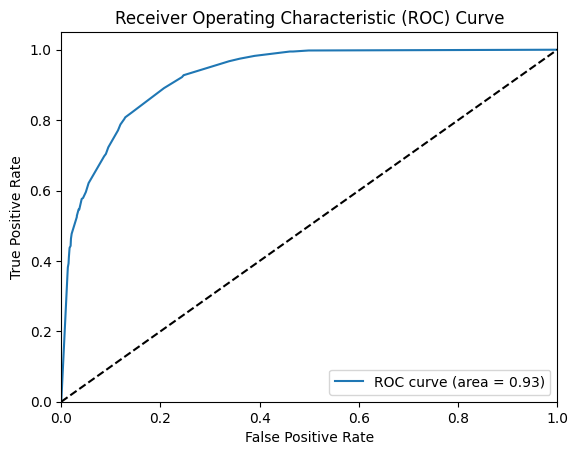

AUC Score: 0.9255384810447573


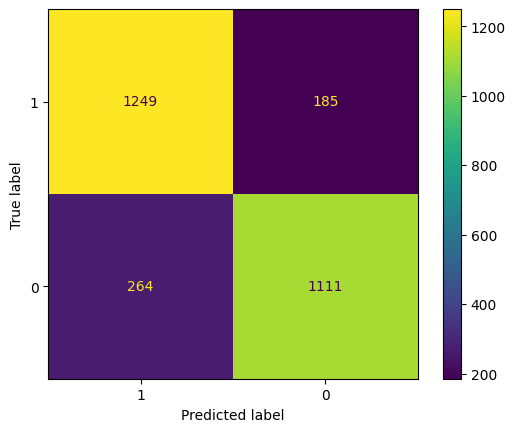

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.797153024911032, 0.800711743772242, 0.8398576512455516, 0.7900355871886121, 0.8149466192170819, 0.8505338078291815, 0.8078291814946619, 0.8327402135231317, 0.8042704626334519, 0.8321428571428572]
Mean accuracy: 0.8170221148957804
95% confidence interval: (0.8023991458914806, 0.8316450839000801)


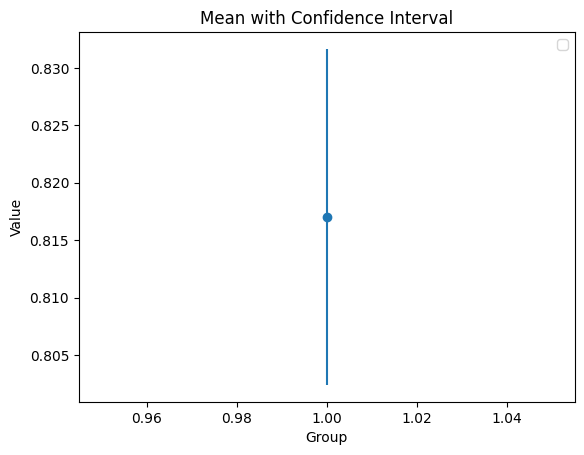

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_clean)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1434
           1       0.78      0.82      0.80      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809



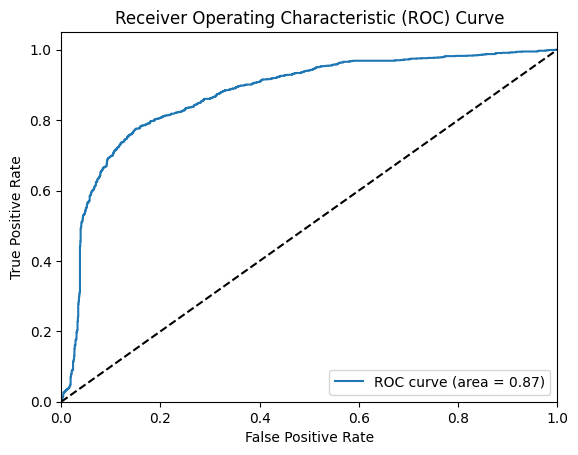

AUC Score: 0.8717332319005959


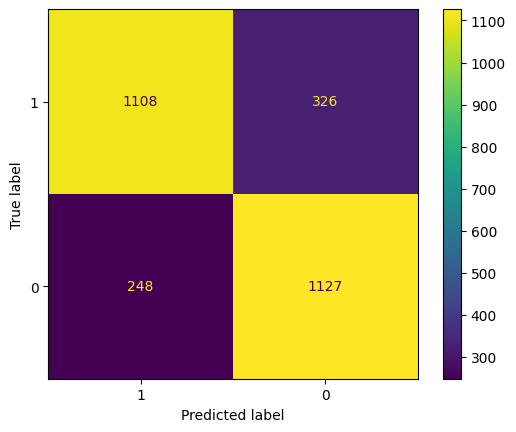

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.7473309608540926, 0.7580071174377224, 0.7651245551601423, 0.8149466192170819, 0.7615658362989324, 0.7651245551601423, 0.7900355871886121, 0.701067615658363, 0.7821428571428571]
Mean accuracy: 0.7703851042196238
95% confidence interval: (0.7460111025447002, 0.7947591058945475)


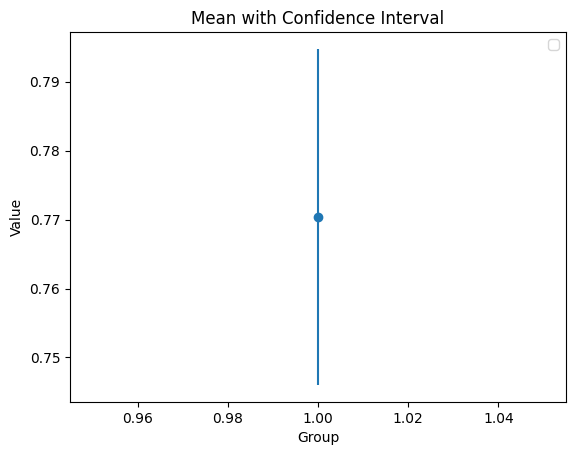

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_clean)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1434
           1       0.86      0.81      0.83      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.645604, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3326, 3228]\nclass = 0')


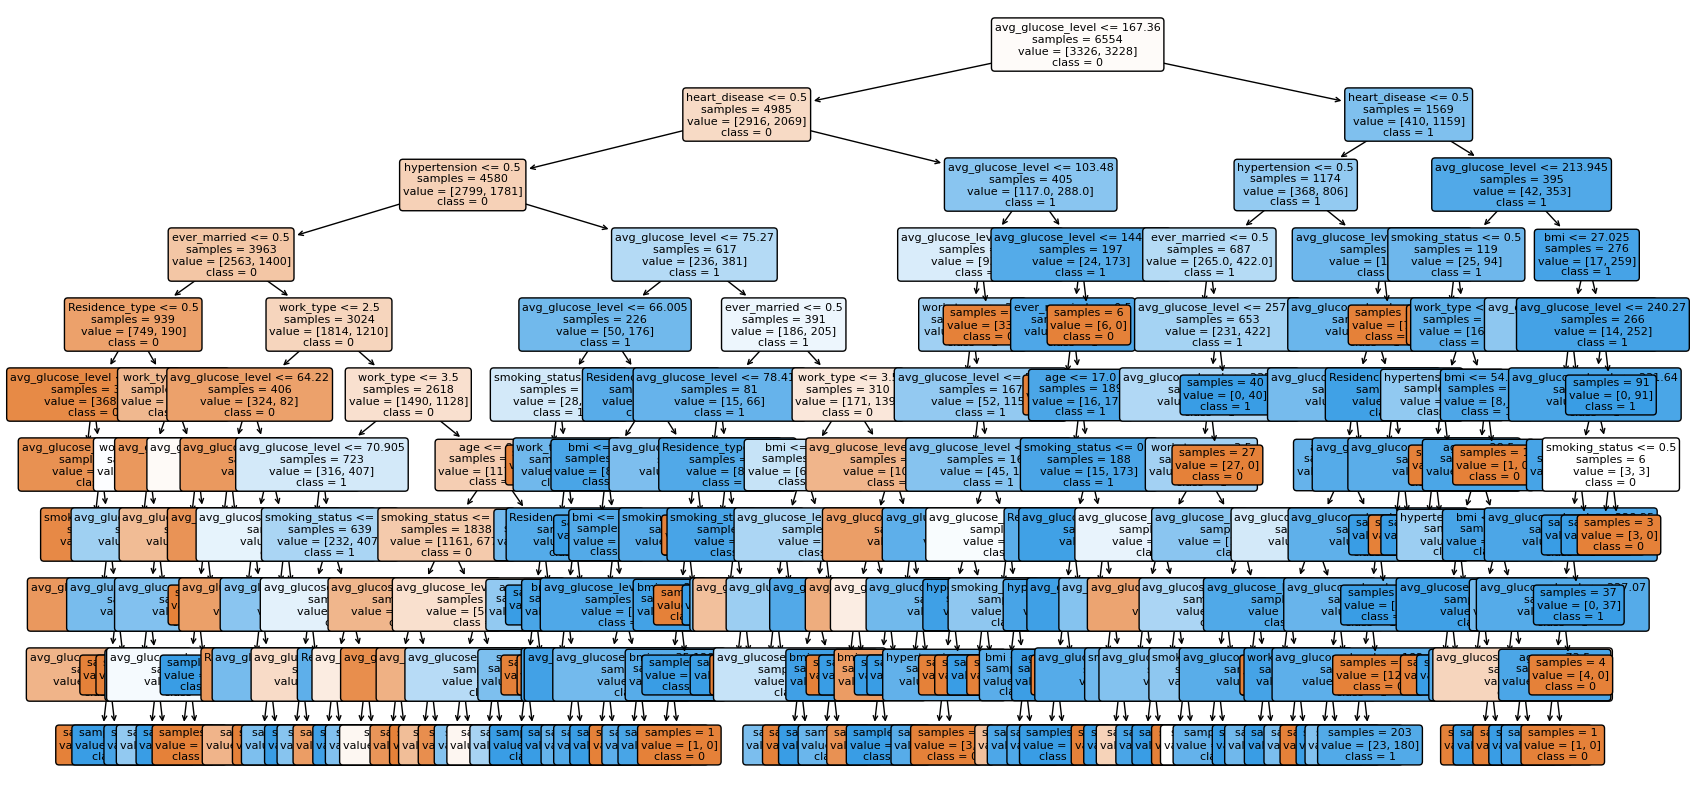

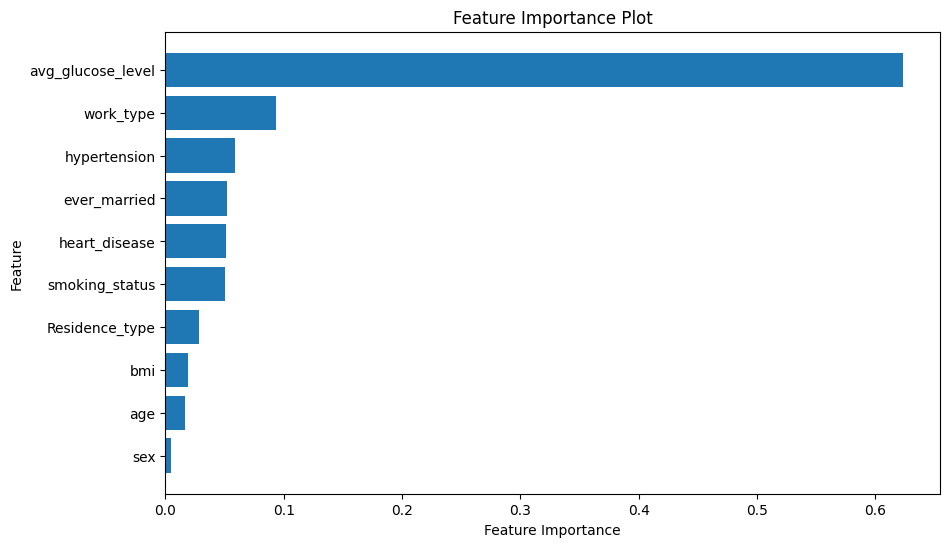

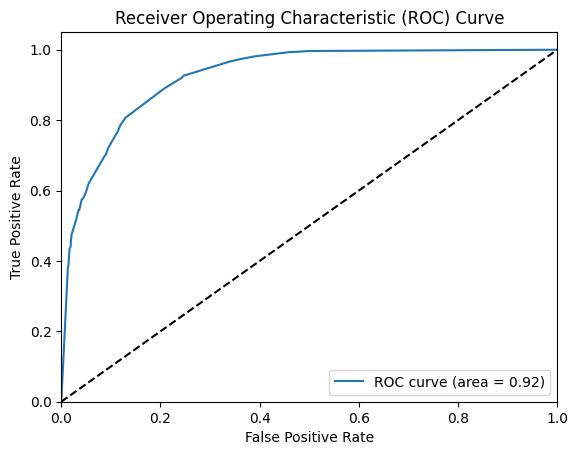

AUC Score: 0.9244247495879296


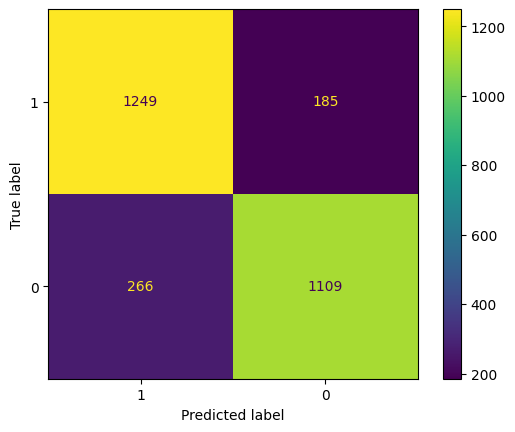

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.8185053380782918, 0.8149466192170819, 0.8434163701067615, 0.8327402135231317, 0.7864768683274022, 0.8398576512455516, 0.8078291814946619, 0.8113879003558719, 0.8428571428571429]
Mean accuracy: 0.8198729028978139
95% confidence interval: (0.8060238565205065, 0.8337219492751213)


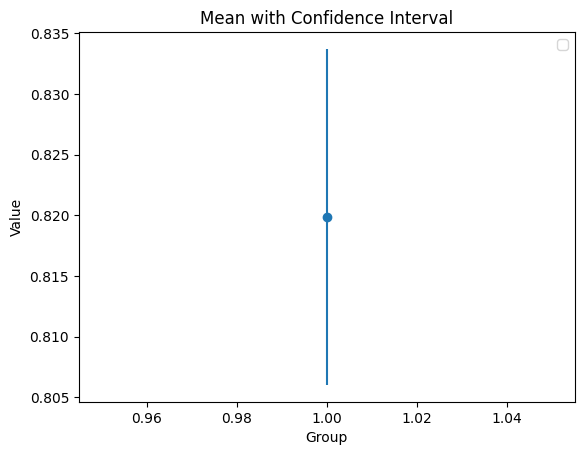

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_clean)
mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1434
           1       0.78      0.82      0.80      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809



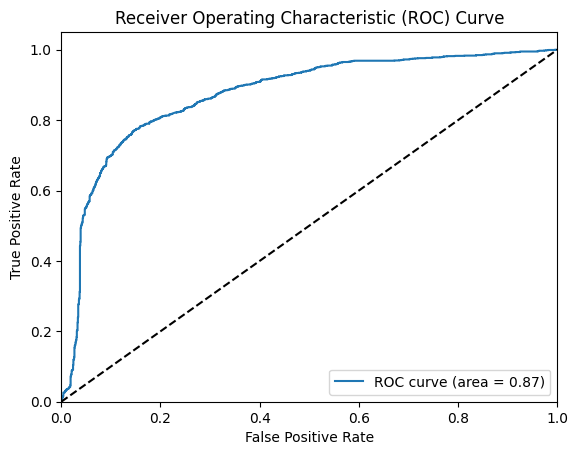

AUC Score: 0.871866108786611


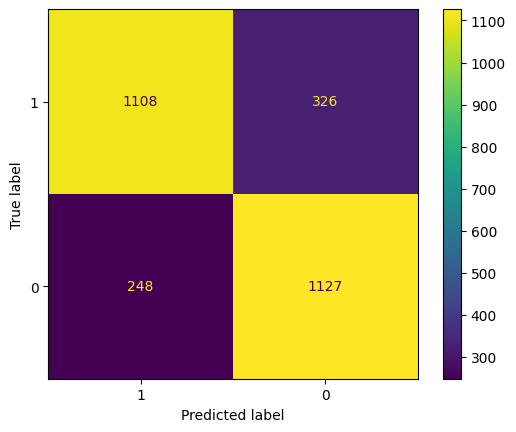

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7722419928825622, 0.7580071174377224, 0.7758007117437722, 0.7651245551601423, 0.7864768683274022, 0.7437722419928826, 0.7829181494661922, 0.7935943060498221, 0.8042704626334519, 0.8071428571428572]
Mean accuracy: 0.7789349262836808
95% confidence interval: (0.7645387376957185, 0.7933311148716431)


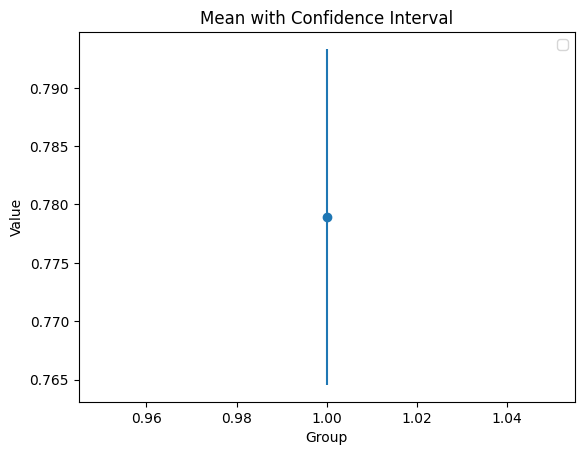

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_clean)
mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

# Categorical

In [32]:
df = df_clean.copy()

--------------------------------------
Value counts:
work_type
4    5833
3    2123
2    1265
1     122
0      20
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


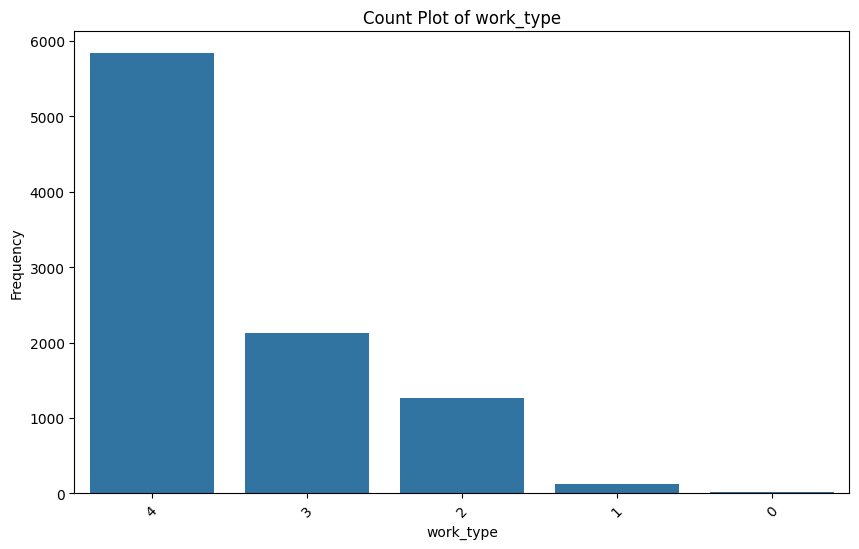

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 50, df)

Least frequent value:  0


Value counts:
work_type
0    4689
4    2927
3    1075
2     623
1      49
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


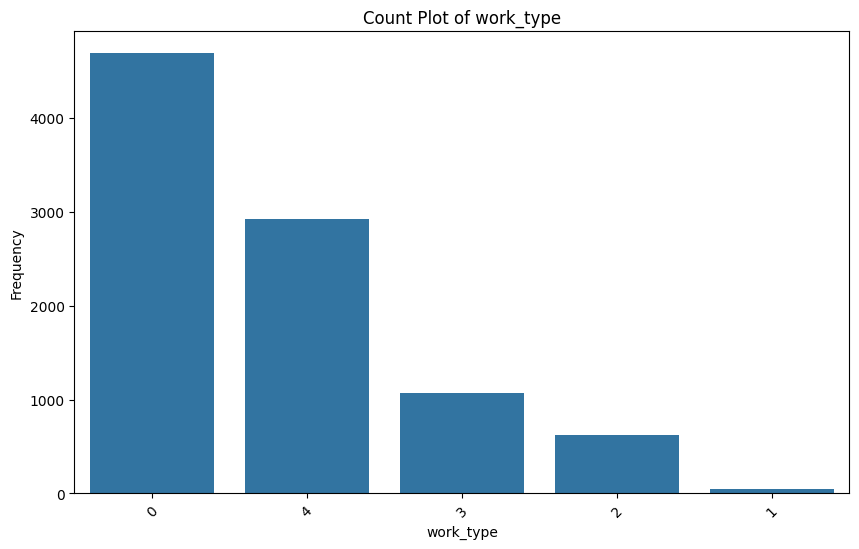

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.83      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809

Node Labels:
 Annotation(0.63958, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


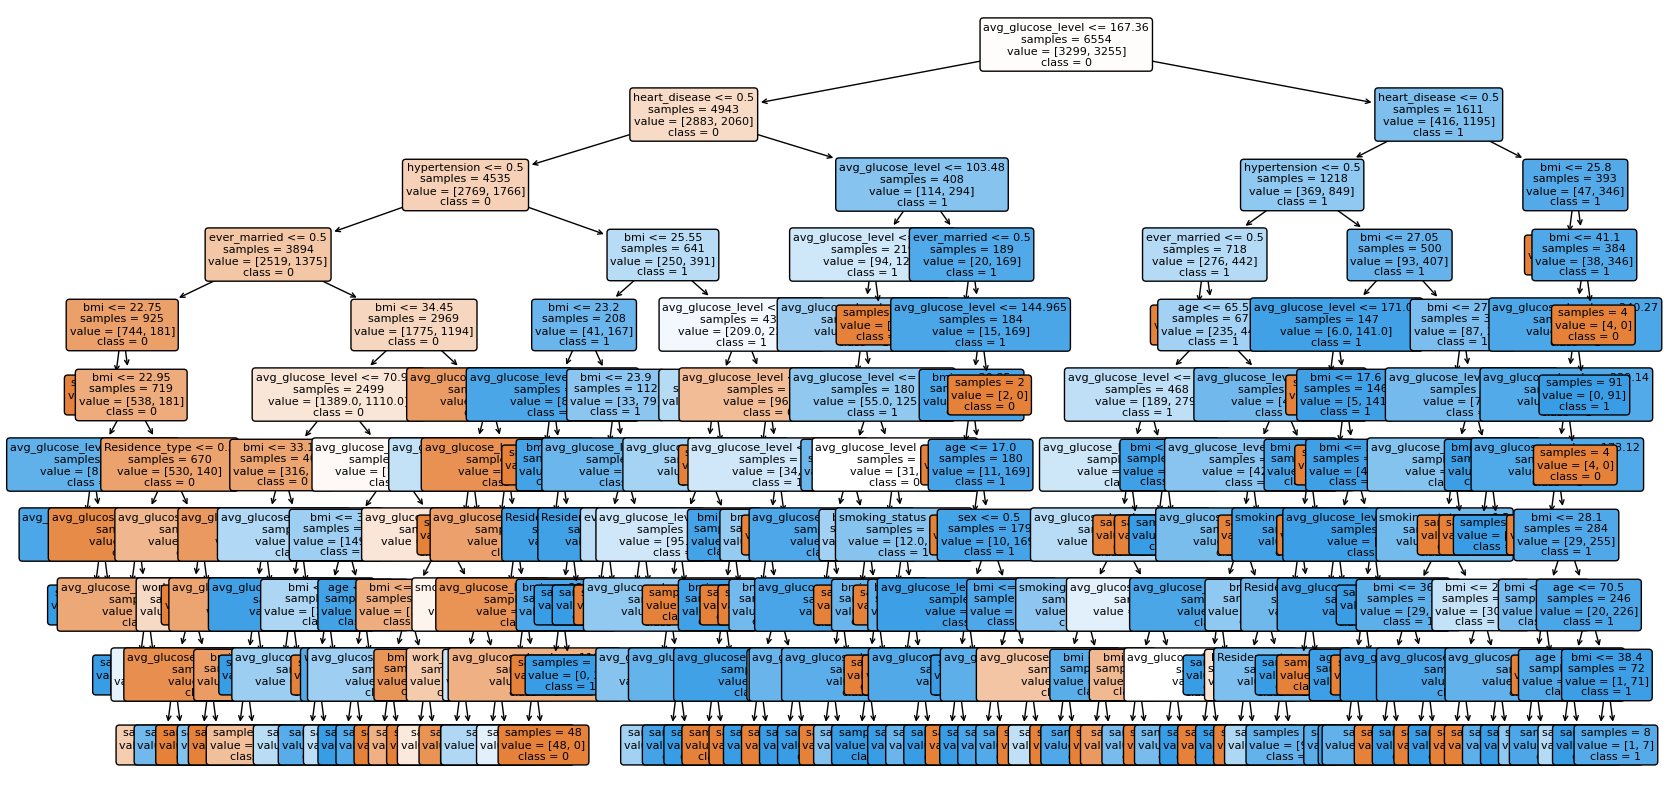

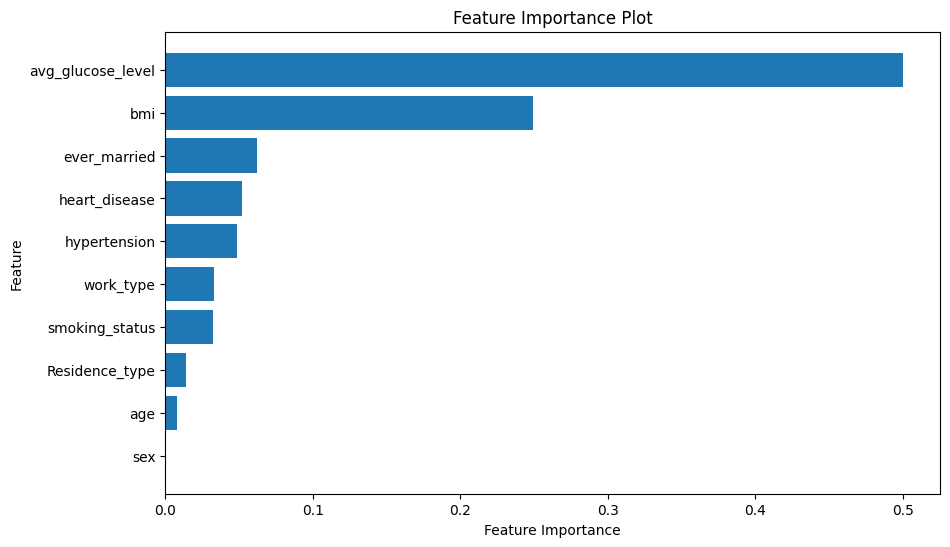

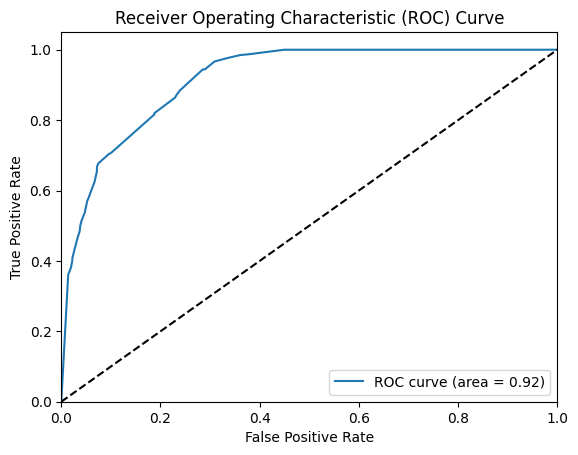

AUC Score: 0.9158967921896792


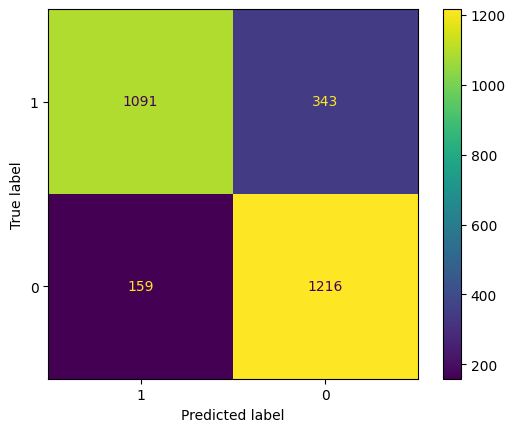

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7508896797153025, 0.8185053380782918, 0.797153024911032, 0.8398576512455516, 0.8220640569395018, 0.8647686832740213, 0.8113879003558719, 0.8647686832740213, 0.8149466192170819, 0.8142857142857143]
Mean accuracy: 0.8198627351296391
95% confidence interval: (0.7962094195610194, 0.8435160506982589)


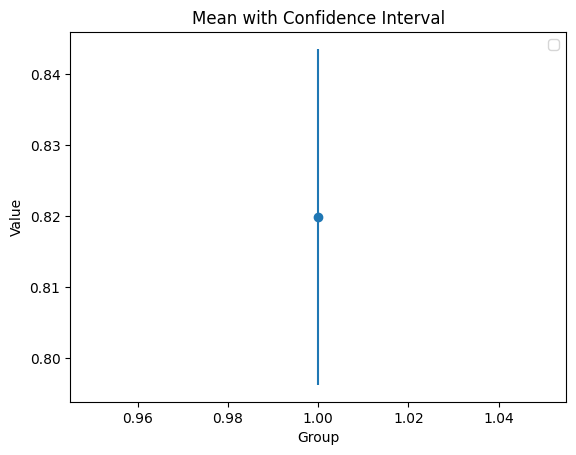

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_clean)
mean_accuracy_dt_categorical, confidence_interval_dt_categorical = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1434
           1       0.77      0.78      0.78      1375

    accuracy                           0.78      2809
   macro avg       0.78      0.78      0.78      2809
weighted avg       0.78      0.78      0.78      2809



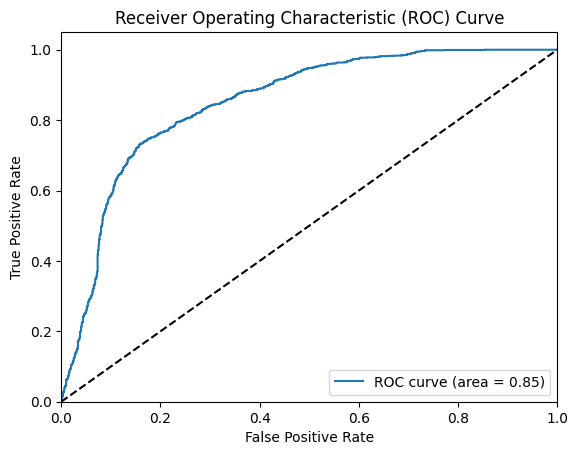

AUC Score: 0.8503195131228605


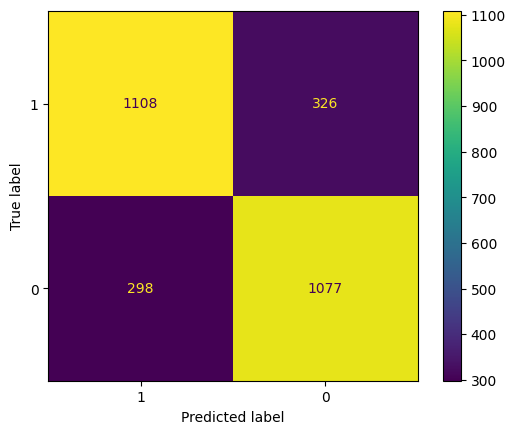

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7651245551601423, 0.7793594306049823, 0.7758007117437722, 0.7686832740213523, 0.8042704626334519, 0.7758007117437722, 0.7900355871886121, 0.7722419928825622, 0.7793594306049823, 0.7928571428571428]
Mean accuracy: 0.7803533299440772
95% confidence interval: (0.7717576334864016, 0.7889490264017529)


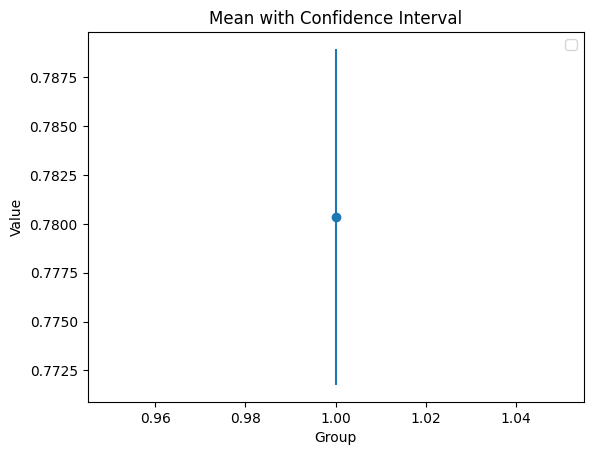

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_clean)
mean_accuracy_svm_categorical, confidence_interval_svm_categorical = ML_algorithms.k_fold_cross_validation_dt(svm,df_clean)

print('--------------------------------------')

## Conclusion

### ROC Curve 

**Decision Tree**

Decision Tree


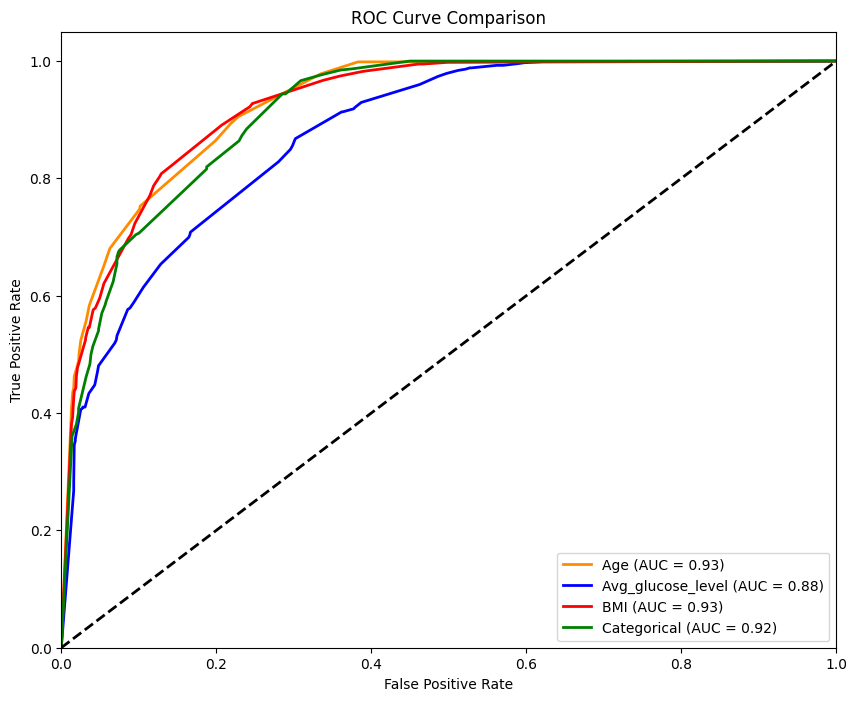

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

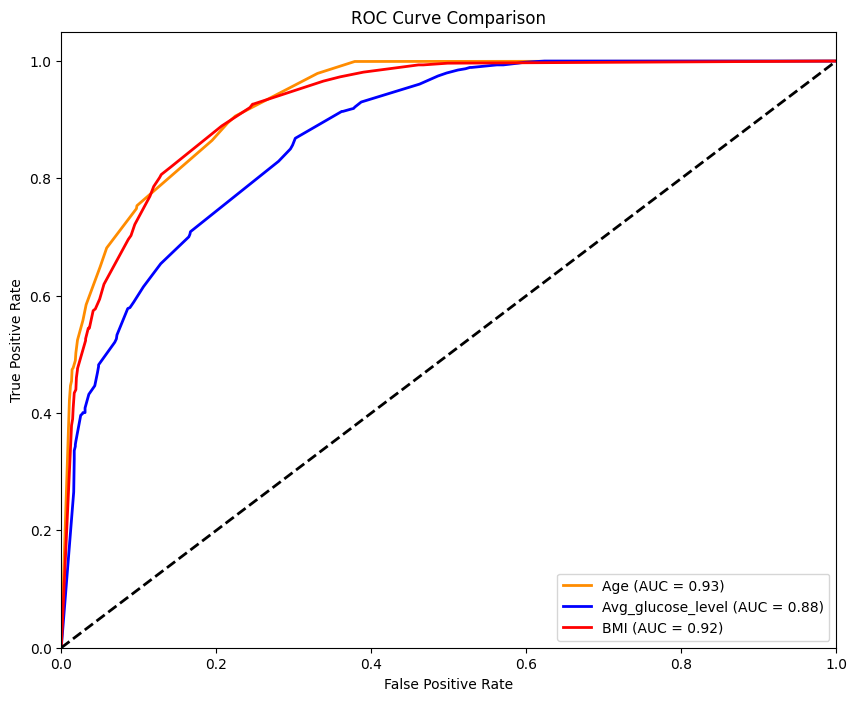

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

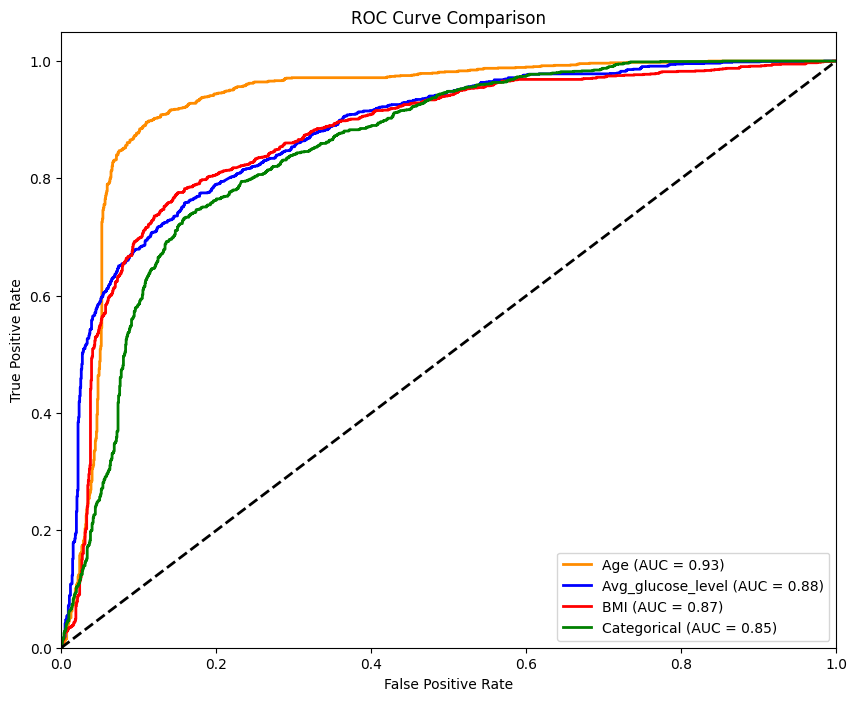

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

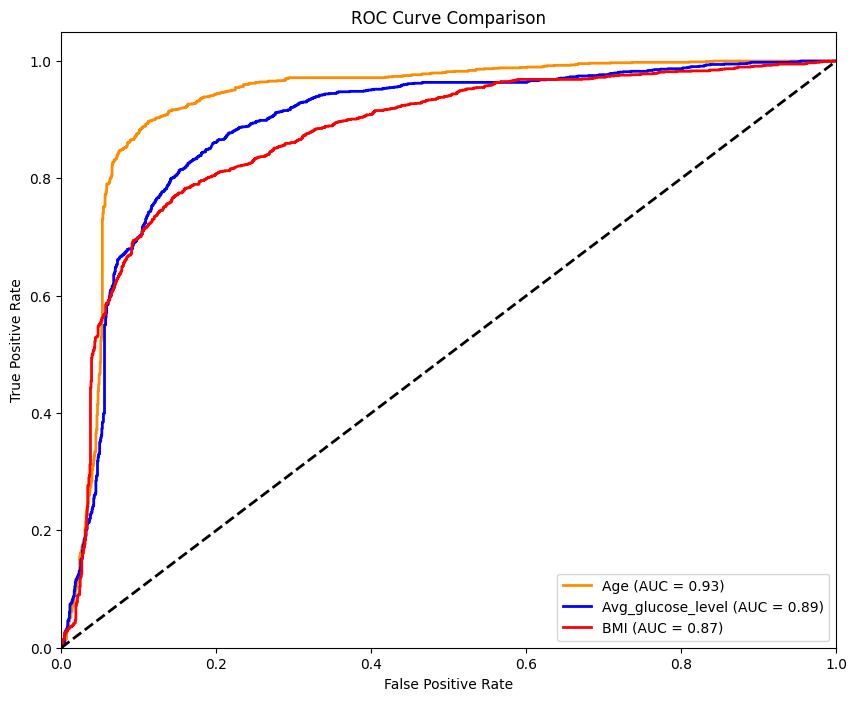

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval

**Decision Tree**

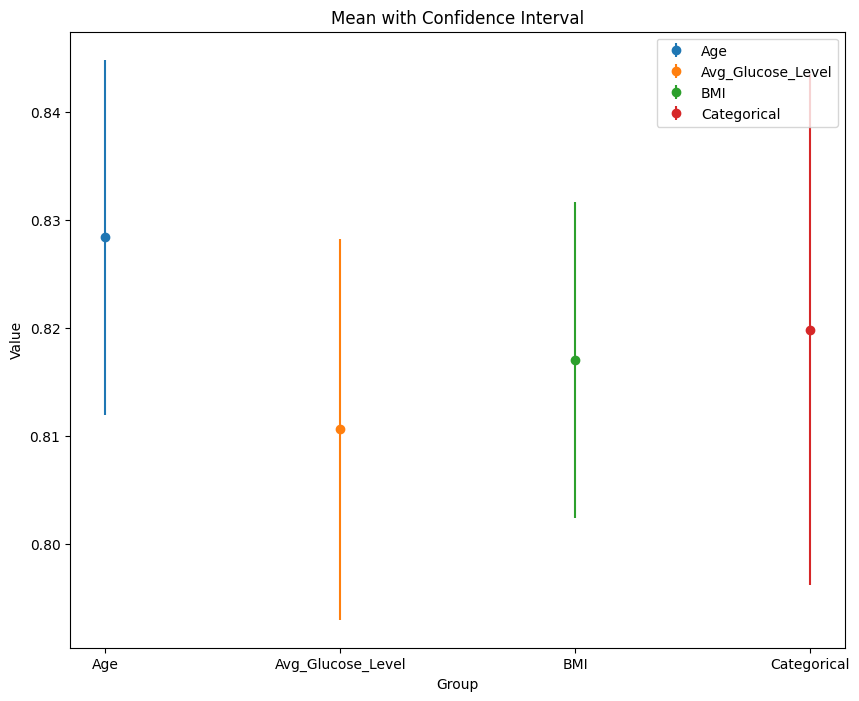

In [42]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Categorical', mean_accuracy_dt_categorical, confidence_interval_dt_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Decision Tree - substitution of outliers**

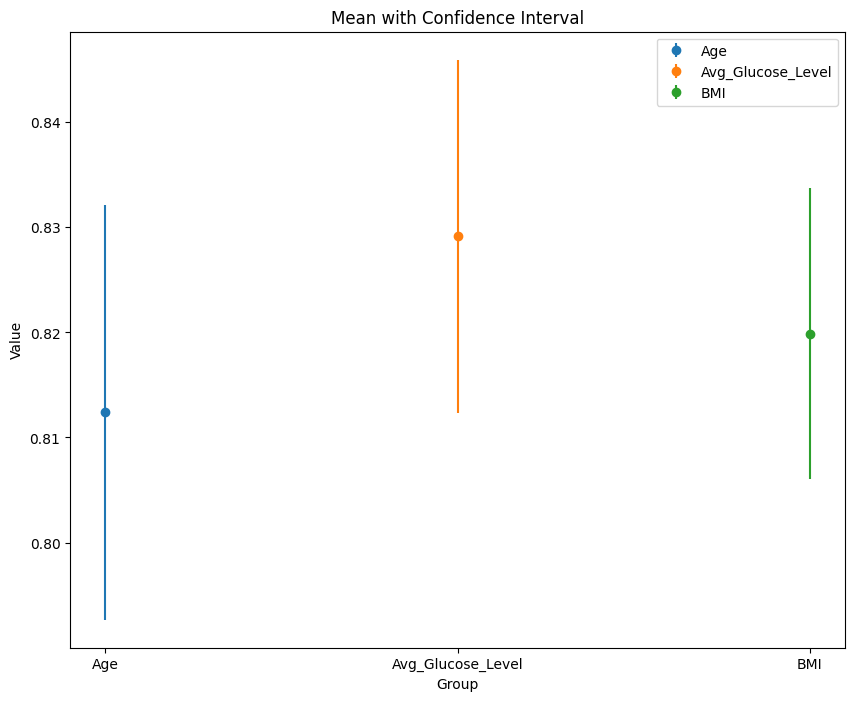

In [43]:
model_results = [
    ('Age', mean_accuracy_dt_20_age, confidence_interval_dt_20_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose),
    ('BMI', mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine**

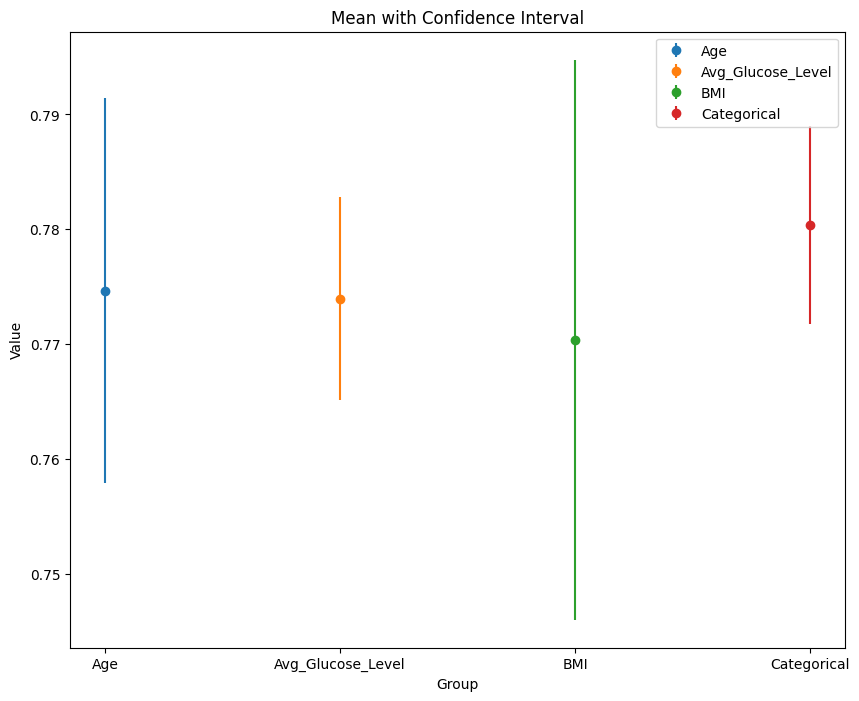

In [44]:
model_results = [
    ('Age', mean_accuracy_svm_age, confidence_interval_svm_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('Categorical', mean_accuracy_svm_categorical, confidence_interval_svm_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine - substitution of outliers**

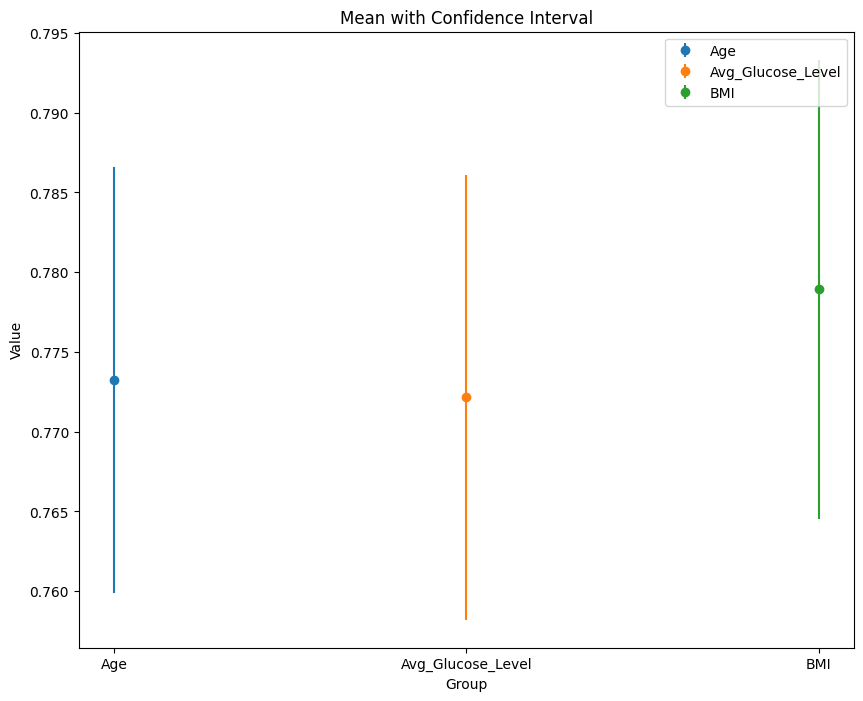

In [45]:
model_results = [
    ('Age', mean_accuracy_svm_20_age, confidence_interval_svm_20_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose),
    ('BMI', mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)